#8 Steps of ML:

    1.Data Gathering
    2.Data pre-processing
    3.Feature Engineering
    4.Choosing Model
    5.Training Model
    6.Test Model/Model Evaluation
    7.Parameter Tuning#Linear regression has no operation that we can tuning,if we change intercept by ourself then we can tune also ,but its not good
    8.Prediction


In [1]:
! pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.1-cp310-cp310-win_amd64.whl (36.9 MB)


You should consider upgrading via the 'C:\python3.10.5\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns#Gave proper visualization
%matplotlib inline
#produce all the graph here,inside our notebook

In [3]:
data = pd.read_csv(r'FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()#to see how much col,which type col we have?
#no missing values 1067

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
data.describe()#Statical view

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
data.columns[0]

'VEHICLECLASS'

In [11]:
data.drop(columns=["MODELYEAR","MAKE","MODEL", "TRANSMISSION"], inplace=True)


In [15]:
data[['FUELTYPE']].value_counts()#prolem arrise when we access throug indexing ,thats why we will drop this col

FUELTYPE
X           514
Z           434
E            92
D            27
dtype: int64

In [14]:
data.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221
2,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136
3,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255
4,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244


In [16]:
data[['VEHICLECLASS']].value_counts()#Same as avobe

VEHICLECLASS            
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
dtype: int64

In [17]:
data.drop(columns=['VEHICLECLASS', 'FUELTYPE'], inplace=True)
data.head()
data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

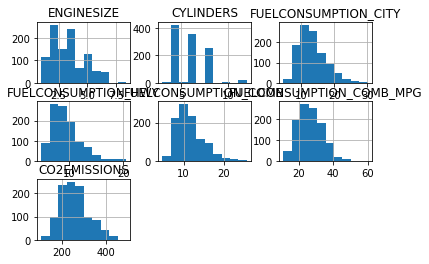

In [18]:
data.hist()#Observation of all cols


array([[<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

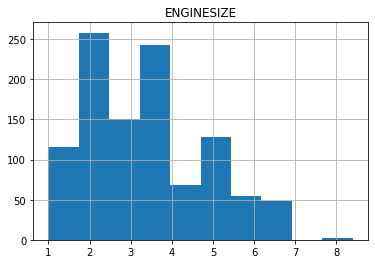

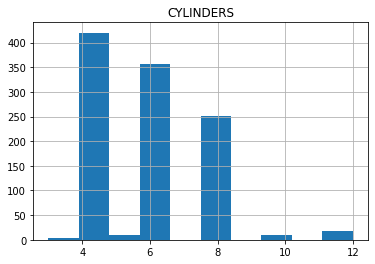

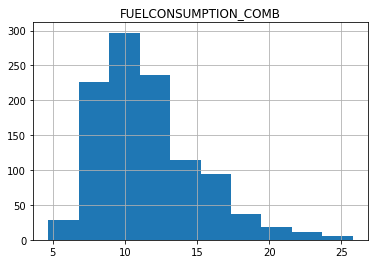

In [19]:
data[['ENGINESIZE']].hist()
data[['CYLINDERS']].hist()
data[['FUELCONSUMPTION_COMB']].hist()

In [20]:
# Feature Selection
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

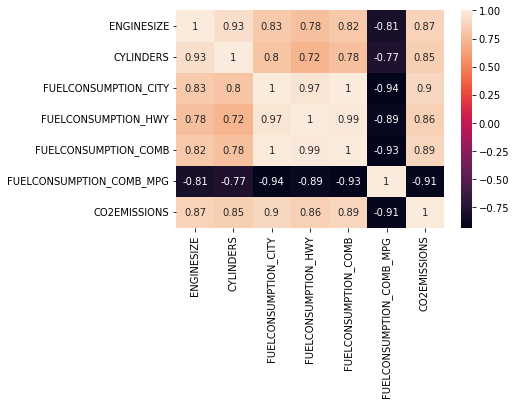

In [21]:
#sns.heatmap(data.corr()) #Negatively Correlate with FUELCONSUMPTION_COMB_MPG
sns.heatmap(data.corr(),annot=True) # use annot for more clear view ,and show points

## There are 2 concept
1.Single Linear Regression(Where we use 1 col to make prediction)
2.Multiple Linear Regression(Where we use 2 or more col to make prediction)

In [22]:
data.drop(columns= ['FUELCONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB' , 'FUELCONSUMPTION_COMB_MPG'] , inplace= True)#(FUELCONSUMPTION_COMB_MPG is neg corr)
#And (FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB)within this 3col FUELCONSUMPTION_CITY is more corr

<AxesSubplot:>

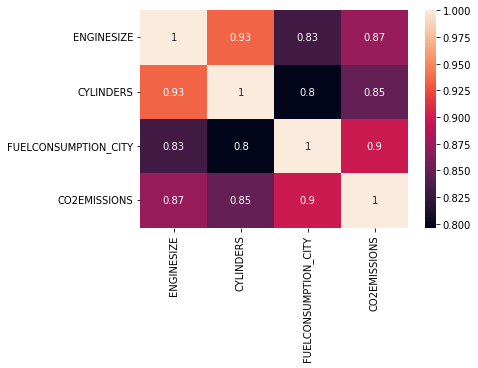

In [26]:
#prb

sns.heatmap(data.corr(),annot=True)#  prb neg corr FUELCONSUMPTION_CITY & CYLINDERS

# Now we need to install Scikit-learn to make all ML & DS Task
## after installing we will import this features for complt out task,
##then we will drop CO2EMISSION and other cols will assign to feature var

In [23]:
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [24]:
feature = data.drop(columns=['CO2EMISSIONS'] )
feature

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
0,2.0,4,9.9
1,2.4,4,11.2
2,1.5,4,6.0
3,3.5,6,12.7
4,3.5,6,12.1
...,...,...,...
1062,3.0,6,13.4
1063,3.2,6,13.2
1064,3.0,6,13.4
1065,3.2,6,12.9


In [25]:
target = data[['CO2EMISSIONS']]
target

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [27]:
! pip install scikit-learn

  Using cached scikit_learn-1.1.1-cp310-cp310-win_amd64.whl (7.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


You should consider upgrading via the 'C:\python3.10.5\python.exe -m pip install --upgrade pip' command.


In [30]:
#Spiliting Data
from sklearn.model_selection import train_test_split #data devided to 2 category,then we can train & test between this 2data,for choose best model thats why model_selec
# train_test_split this func return xtrain xtest,ytrain ytest
#xtrain,xtest,ytrain,ytest = train_test_split(data , feature,test_size = 0.25 , random_state = 1)#provide All col
xtrain,xtest,ytrain,ytest = train_test_split(feature , target , test_size = 0.25 , random_state = 1)
#25 % data use for x&y test,75% data for x&y train.random_state 1 combination of use for x,y train & x,y test data will b fixed,not will be supple

xtrain#800 val 3 cols
xtest#267 values 3 cols
ytest
ytrain

,CO2EMISSIONS
759,363
671,297
408,162
734,179
574,253
...,...
847,200
715,175
905,292
235,244


In [31]:
xtrain.shape,xtest.shape

((800, 3), (267, 3))

In [32]:
ytrain.shape,ytest.shape

((800, 1), (267, 1))

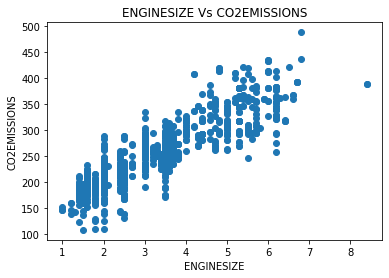

In [33]:
#prb

#Choosing Model
#data[['ENGINESIZE', 'CO2EMISSIONS']].plot(kind='scatter')#Another way,may b try next tym
#data['ENGINESIZE'],data['CO2EMISSIONS'].plot(kind='scatter')  # prb ValErr :plot kind scatter can only be used for data frames
#plt.plot(feature.ENGINESIZE,target.values)#Line plot
plt.scatter(feature.ENGINESIZE,target.values)#Values will convert to numpy array
plt.title('ENGINESIZE Vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [34]:

#Modeling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain[['ENGINESIZE']] , ytrain.values.ravel())  
#to train model fit func is there,parameter contains xtrain & ytrain,which i want to train
#Now training has done

LinearRegression()

In [35]:
#check for 2D 3D 1D
ytrain#DataFrame
ytrain.values#Now its 2D numpy Array
ytrain.values.ravel()#Now it is convert to 1D array

xtrain.ENGINESIZE#Series
xtrain.ENGINESIZE.values

array([5.5, 4.6, 2. , 2. , 3.2, 1.5, 1.6, 3.5, 4.6, 1.8, 5.3, 2. , 2. ,
       2.5, 5.5, 1.5, 4. , 4.4, 3. , 2. , 3.6, 2. , 5.9, 1.8, 2.5, 5.3,
       3.5, 6.8, 5.5, 2.7, 2.5, 2. , 3.5, 2.4, 2.7, 5. , 5.7, 3.6, 4.4,
       1.6, 3.6, 2.5, 4.7, 6.7, 3.7, 3.5, 3.6, 2. , 2.7, 5.6, 4.4, 6.6,
       2. , 3.6, 6. , 2. , 2.5, 2.4, 6.2, 2. , 2.4, 2. , 1.6, 2.5, 6. ,
       5.3, 2. , 5.3, 3. , 4.4, 4.3, 2.4, 1.8, 1.4, 2.5, 4.6, 3.6, 3.6,
       2. , 2.5, 5.4, 1.5, 4. , 2.5, 5. , 3. , 2. , 1.6, 3.6, 2. , 1.8,
       3.6, 1. , 4.4, 3. , 1.5, 2.7, 2. , 3. , 2.5, 4.3, 5.3, 3.7, 3.7,
       3.3, 2.7, 2. , 3.6, 5.2, 3.6, 2.4, 3.6, 6. , 5. , 2.5, 2.4, 3.5,
       2.5, 3.5, 2. , 2.4, 3.5, 5.7, 2. , 2.4, 5. , 3.7, 3.6, 2. , 1.6,
       2.4, 2. , 1.2, 5.3, 1.4, 3.6, 1.6, 3.5, 2.4, 2. , 2. , 2. , 1.6,
       1.4, 3.6, 5.3, 5.3, 3.6, 2. , 2.7, 3. , 2.7, 2.4, 1.8, 2. , 6.2,
       3.7, 5.3, 5. , 4.4, 3.5, 2.4, 3. , 3.6, 6.2, 3.6, 3.5, 2. , 3. ,
       6.2, 1.6, 4. , 2. , 5.3, 3.6, 5.3, 3. , 2.4, 3.6, 4.4, 2.

In [36]:
model.intercept_#That is (THETA 0)

124.23458594672337

In [37]:
model.coef_#1 Feature thats why (Theta 1),when more it will b theta1,theta2


array([39.54874496])

In [38]:
data.iloc[[132,341]]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
132,4.4,8,18.1,370
341,1.4,4,9.3,193


In [38]:
data.iloc[[133,340]]#Actual prediction,ENGINESIZE 3.0,CO2EMISSIONS 274

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
133,3.0,6,13.6,274
340,1.4,4,10.0,200


In [39]:
#prb

ypred = model.predict(xtest[['ENGINESIZE']])#prb 267 outputs,how does it predict?based on enginsize predict co2emission???or xtest=267 but xtrain =800.so can we predict?
#ypred = yhat value based on algorithm
xtest[['ENGINESIZE']] , ypred#now lets see co2emission depending on engSize,in prev cell we have actual val

(      ENGINESIZE
 133          3.0
 340          1.4
 948          2.0
 704          2.0
 661          4.6
 ...          ...
 238          4.3
 546          5.6
 773          1.8
 354          3.5
 1041         2.0
 
 [267 rows x 1 columns],
 array([242.88082083, 179.60282889, 203.33207587, 203.33207587,
        306.15881277, 242.88082083, 203.33207587, 195.42232688,
        242.88082083, 219.15157386, 219.15157386, 242.88082083,
        219.15157386, 329.88805975, 223.10644835, 223.10644835,
        187.51257789, 298.24906378, 262.65519331, 219.15157386,
        361.52705572, 223.10644835, 270.56494231, 262.65519331,
        270.56494231, 242.88082083, 171.6930799 , 341.75268324,
        187.51257789, 203.33207587, 242.88082083, 329.88805975,
        262.65519331, 333.84293425, 282.42956579, 333.84293425,
        369.43680471, 183.55770339, 290.33931479, 254.74544432,
        242.88082083, 373.39167921, 203.33207587, 266.61006781,
        270.56494231, 203.33207587, 179.60282889, 179

In [41]:
xtest[['ENGINESIZE']].iloc[0],ypred[0],ytest.values[0]

(ENGINESIZE    3.0
 Name: 133, dtype: float64,
 242.88082083279193,
 array([274], dtype=int64))

In [42]:
#calculate actual error
ytest.values[0] - ypred[0]

array([31.11917917])

In [43]:
#Evaluation
#now we do evaluate avg error and how much predict correctly 
#sklearn gave metrics function that contains many evaluation func,which func throug we evaluate error and check performance

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
print('AVG Mean Absolute Error: ' , mean_absolute_error(ytest , ypred))#mean_absolute_error take 2 paramtr,1 is y_true means ytest
print('Mean Squared Error: ' , mean_squared_error(ytest , ypred))
print('R2Score ,cal  % Error:  ' , r2_score(ytest , ypred))

AVG Mean Absolute Error:  23.183704964940226
Mean Squared Error:  947.2869872487785
R2Score ,cal  % Error:   0.7633265438534859


# Prediction for CYLINDERS

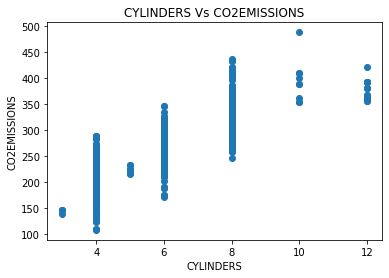

In [44]:

plt.scatter(feature.CYLINDERS,target.values)#Values will convert to numpy array
plt.title('CYLINDERS Vs CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [45]:
data.iloc[[133,340]]


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
133,3.0,6,13.6,274
340,1.4,4,10.0,200


In [46]:
xtest[['CYLINDERS']].iloc[0],ypred[0],ytest.values[0]

(CYLINDERS    6
 Name: 133, dtype: int64,
 242.88082083279193,
 array([274], dtype=int64))

In [47]:
modelCY1 = LinearRegression()
modelCY1.fit(xtrain[['CYLINDERS']] , ytrain.values.ravel())
print(modelCY1.intercept_)#Theta 0
print(modelCY1.coef_)#Theta 1
ypred = modelCY1.predict(xtest[['CYLINDERS']])
xtest[['CYLINDERS']] , ypred

82.10634518016053
[30.09889888]


(      CYLINDERS
 133           6
 340           4
 948           4
 704           4
 661           8
 ...         ...
 238           6
 546           8
 773           4
 354           6
 1041          4
 
 [267 rows x 1 columns],
 array([262.69973848, 202.50194072, 202.50194072, 202.50194072,
        322.89753625, 262.69973848, 202.50194072, 202.50194072,
        262.69973848, 202.50194072, 202.50194072, 262.69973848,
        202.50194072, 383.09533402, 202.50194072, 202.50194072,
        202.50194072, 322.89753625, 262.69973848, 202.50194072,
        322.89753625, 202.50194072, 262.69973848, 262.69973848,
        262.69973848, 262.69973848, 172.40304183, 322.89753625,
        202.50194072, 202.50194072, 262.69973848, 383.09533402,
        262.69973848, 322.89753625, 322.89753625, 322.89753625,
        322.89753625, 202.50194072, 322.89753625, 262.69973848,
        262.69973848, 443.29313179, 202.50194072, 262.69973848,
        262.69973848, 202.50194072, 202.50194072, 202.50194072,
 

In [48]:
print('AVG Mean Absolute Error: ' , mean_absolute_error(ytest , ypred))#mean_absolute_error take 2 paramtr,1 is y_true means ytest
print('Mean Squared Error: ' , mean_squared_error(ytest , ypred))
print('R2Score ,cal  % Error:  ' , r2_score(ytest , ypred))

AVG Mean Absolute Error:  25.14225028771549
Mean Squared Error:  1060.6489957960428
R2Score ,cal  % Error:   0.7350037876879928


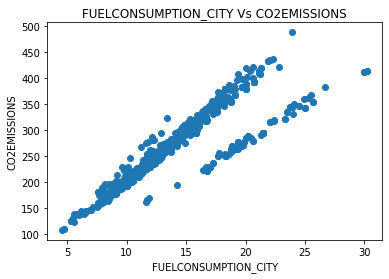

In [49]:
#Linear Regression with FUELCONSUMPTION_CITY
plt.scatter(feature.FUELCONSUMPTION_CITY,target.values)#Values will convert to numpy array
plt.title('FUELCONSUMPTION_CITY Vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()


In [50]:
model1FCC = LinearRegression()
model1FCC.fit(xtrain[['FUELCONSUMPTION_CITY']] , ytrain.values.ravel())
print(model1FCC.intercept_)#Theta 0
print(model1FCC.coef_)#Theta 1
#Prediction
ypred = model1FCC.predict(xtest[['FUELCONSUMPTION_CITY']])
xtest[['FUELCONSUMPTION_CITY']] , ypred

70.14701008083796
[13.99871568]


(      FUELCONSUMPTION_CITY
 133                   13.6
 340                   10.0
 948                    9.6
 704                    8.0
 661                   15.7
 ...                    ...
 238                   18.9
 546                   17.4
 773                   10.3
 354                   13.3
 1041                   7.9
 
 [267 rows x 1 columns],
 array([260.52954326, 210.13416683, 204.53468056, 182.13673548,
        289.92684618, 207.3344237 , 191.93583645, 201.73493743,
        229.73236878, 196.13545116, 231.13224034, 267.5289011 ,
        204.53468056, 358.52055299, 201.73493743, 184.93647862,
        200.33506586, 312.32479126, 261.92941483, 225.53275407,
        492.90822347, 221.33313937, 246.53082759, 252.13031386,
        280.12774521, 236.73172661, 168.13801981, 242.33121288,
        190.53596489, 259.12967169, 214.33378153, 365.51991083,
        236.73172661, 371.1193971 , 268.92877267, 294.12646088,
        333.32286477, 180.73686391, 366.91978239, 256.3299285

In [51]:
print('AVG Mean Absolute Error: ' , mean_absolute_error(ytest , ypred))#mean_absolute_error take 2 paramtr,1 is y_true means ytest
print('Mean Squared Error: ' , mean_squared_error(ytest , ypred))
print('R2Score ,cal  % Error:  ' , r2_score(ytest , ypred))

AVG Mean Absolute Error:  20.185092379335014
Mean Squared Error:  847.1415775522806
R2Score ,cal  % Error:   0.788347219265608


# Now Will Start with Multiple Linear Regression
## Class 24

In [54]:
xtrain ,ytrain
feature, target

(      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
 0            2.0          4                   9.9
 1            2.4          4                  11.2
 2            1.5          4                   6.0
 3            3.5          6                  12.7
 4            3.5          6                  12.1
 ...          ...        ...                   ...
 1062         3.0          6                  13.4
 1063         3.2          6                  13.2
 1064         3.0          6                  13.4
 1065         3.2          6                  12.9
 1066         3.2          6                  14.9
 
 [1067 rows x 3 columns],
       CO2EMISSIONS
 0              196
 1              221
 2              136
 3              255
 4              244
 ...            ...
 1062           271
 1063           264
 1064           271
 1065           260
 1066           294
 
 [1067 rows x 1 columns])

In [55]:
modelMulLR1 = LinearRegression()
modelMulLR1.fit(xtrain , ytrain.values.ravel())

LinearRegression()

In [56]:
#prb

modelMulLR1.intercept_# prb If coef 3(Theta1,Theta2,theta3),then intercept should b 3?? 

69.53741892732671

In [57]:
modelMulLR1.coef_

array([12.0361132 ,  5.48464928,  8.64096118])

In [58]:
#Now Evaluate model that how much correctly work our prediction 
#Prediction
ypred = modelMulLR1.predict(xtest)#Gave all 3 cols

print('AVG Mean Absolute Error: ' , mean_absolute_error(ytest , ypred))#mean_absolute_error take 2 paramtr,1 is y_true means ytest
print('Mean Squared Error: ' , mean_squared_error(ytest , ypred))
print('R2Score ,cal  % Error:  ' , r2_score(ytest , ypred))

AVG Mean Absolute Error:  17.088547401405325
Mean Squared Error:  575.8397651491647
R2Score ,cal  % Error:   0.8561302021045729


In [59]:
#prb

from sklearn.model_selection import KFold#it will do Kfold through index,and split train & test through that index

#Predict accuracy
accuracy = []

folds = KFold(n_splits=4)
#folds.split(feature)#It will provide generator object so we need to access through next
#next(folds.split(feature))#bUT WE WILL ACCESS through for loop
for train_index , test_index in folds.split(feature):#  we can provide also target
    #print(train_index ,test_index)#WE will provide this training and testing set to our data
        #Extracting Data
    xtrain = feature.iloc[train_index]
    ytrain = target.iloc[train_index]

    xtest = feature.iloc[test_index]
    ytest = target.iloc[test_index]

    #Modeling
    modelMulLR2 = LinearRegression()
    modelMulLR2.fit(xtrain , ytrain)

    #Evaluation
    #Prediction
    print('====================================')
    ypred = modelMulLR2.predict(xtest)

    print('AVG Mean Absolute Error: ' , mean_absolute_error(ytest , ypred))#mean_absolute_error take 2 paramtr,1 is y_true means ytest
    print('Mean Squared Error: ' , mean_squared_error(ytest , ypred))
    print('R2Score ,cal  % Error:  ' , r2_score(ytest , ypred))

    accuracy.append(r2_score(ytest , ypred))
  


AVG Mean Absolute Error:  16.108225095604656
Mean Squared Error:  547.0541114743631
R2Score ,cal  % Error:   0.8677191577518629
AVG Mean Absolute Error:  23.705397402575077
Mean Squared Error:  1069.4632921198686
R2Score ,cal  % Error:   0.7688497128196293
AVG Mean Absolute Error:  16.481141302533242
Mean Squared Error:  460.5269190483797
R2Score ,cal  % Error:   0.867643981477763
AVG Mean Absolute Error:  14.155874489031316
Mean Squared Error:  371.64820797878446
R2Score ,cal  % Error:   0.8874419256859027


In [64]:
print('Average R2 Score' , sum(accuracy)/10)
print(ytest.iloc[:6])#Actual CO2EMOSSION
print(xtest[:4])
print(ypred[:6])#Our predicted CO2EMISSION

Average R2 Score 0.3391654777735158
     CO2EMISSIONS
801           196
802           191
803           184
804           191
805           184
806           191
     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
801         1.6          4                   9.3
802         1.6          4                   9.3
803         1.6          4                   9.1
804         1.6          4                   9.3
[[191.29253458]
 [191.29253458]
 [189.76511776]
 [191.29253458]
 [189.76511776]
 [191.29253458]]


In [65]:
#Cross validation another way
from sklearn.model_selection import cross_val_score
cvModel = LinearRegression()
cv = cross_val_score(cvModel,feature,target , cv=10) #cv 10 folds
cv, cv.mean()#Average R2Score 

(array([0.92026691, 0.84939559, 0.73940185, 0.83232468, 0.81342395,
        0.82255311, 0.88161856, 0.88799364, 0.9137904 , 0.86623948]),
 0.8527008169436309)

In [66]:
#Model Visualization
modelVisu1 = LinearRegression()
modelVisu1.fit(feature[['ENGINESIZE']] , target)
#Now our training is done

LinearRegression()

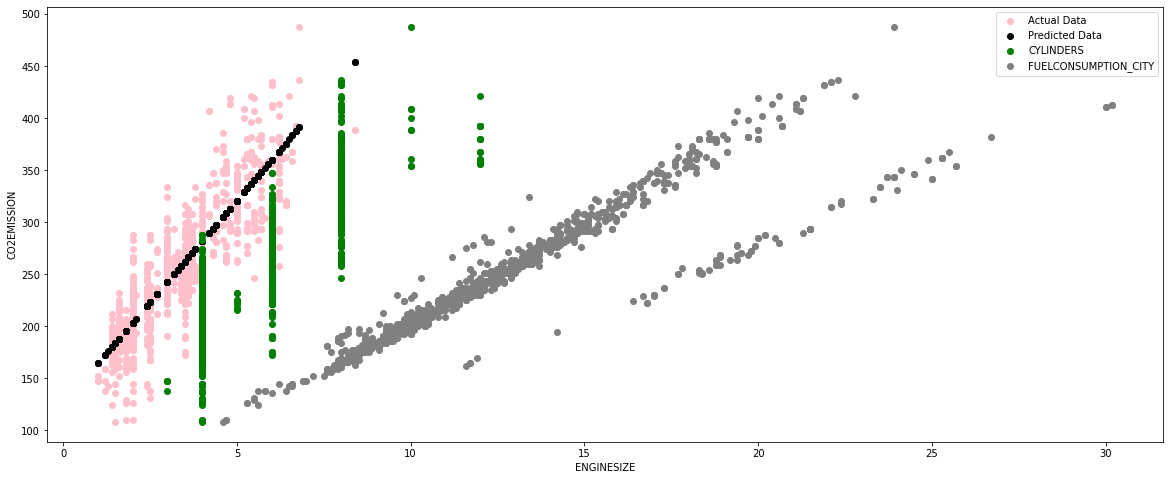

In [71]:
fig = plt.figure(2, figsize=(20,8))
plt.scatter(feature[['ENGINESIZE']].values , target.values , label = 'Actual Data' , color = 'pink')
plt.scatter(feature[['ENGINESIZE']].values , modelVisu1.predict(feature[['ENGINESIZE']]) , label = 'Predicted Data' , color = 'black')
plt.scatter(feature[['CYLINDERS']].values , target.values , label = 'CYLINDERS' , color = 'green')
plt.scatter(feature[['FUELCONSUMPTION_CITY']].values , target.values , label = 'FUELCONSUMPTION_CITY' , color = 'gray')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.legend()
plt.show()

In [69]:
dummyFeature = np.linspace(0,10,400).reshape(-1,1)#Now its 2D array
dummyFeature

array([[ 0.        ],
       [ 0.02506266],
       [ 0.05012531],
       [ 0.07518797],
       [ 0.10025063],
       [ 0.12531328],
       [ 0.15037594],
       [ 0.1754386 ],
       [ 0.20050125],
       [ 0.22556391],
       [ 0.25062657],
       [ 0.27568922],
       [ 0.30075188],
       [ 0.32581454],
       [ 0.35087719],
       [ 0.37593985],
       [ 0.40100251],
       [ 0.42606516],
       [ 0.45112782],
       [ 0.47619048],
       [ 0.50125313],
       [ 0.52631579],
       [ 0.55137845],
       [ 0.5764411 ],
       [ 0.60150376],
       [ 0.62656642],
       [ 0.65162907],
       [ 0.67669173],
       [ 0.70175439],
       [ 0.72681704],
       [ 0.7518797 ],
       [ 0.77694236],
       [ 0.80200501],
       [ 0.82706767],
       [ 0.85213033],
       [ 0.87719298],
       [ 0.90225564],
       [ 0.9273183 ],
       [ 0.95238095],
       [ 0.97744361],
       [ 1.00250627],
       [ 1.02756892],
       [ 1.05263158],
       [ 1.07769424],
       [ 1.10275689],
       [ 1

c:\python3.10.5\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


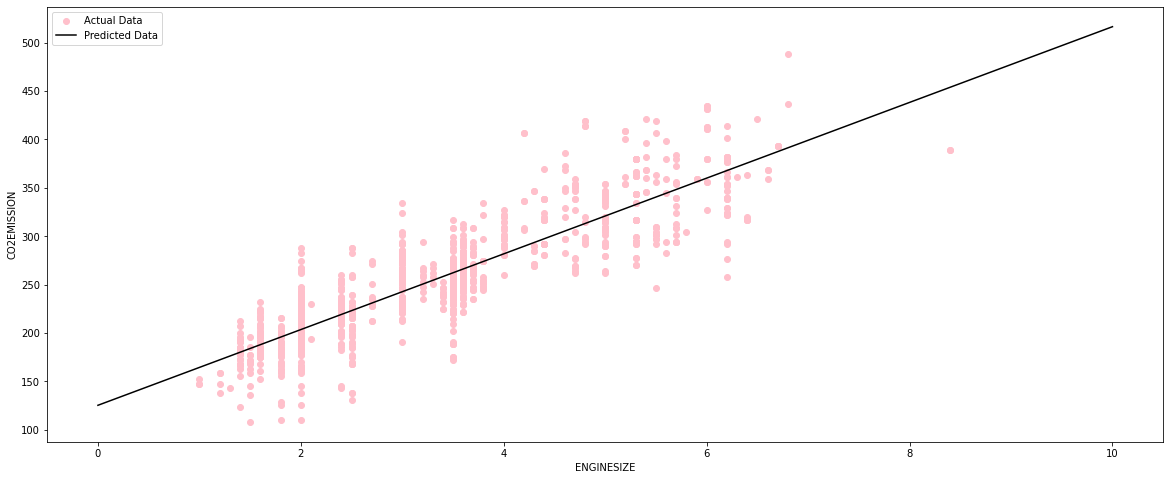

In [74]:
#prb

#We do here lineplot
fig = plt.figure(2, figsize=(20,8))
plt.scatter(feature[['ENGINESIZE']].values , target.values , label = 'Actual Data' , color = 'pink')
plt.plot(dummyFeature , modelVisu1.predict(dummyFeature) , label = 'Predicted Data' , color = 'black')#How does it plot ,x ==2 y==3,should be 200/300
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.legend()
plt.show()

In [75]:
#3D
dummyFeature1 = np.linspace(0,10,400)
dummyFeature2 = np.linspace(4,31,400)
#Without reshape we can concatinate both dummyfeature as 2 cols.2now separated,so we need to put both in a table
dumFea = np.c_[dummyFeature1,dummyFeature2]#Concatinate both feature
#feature[[feature.columns[-1]]].min()#To see FUELCONSUMPTION_CITY colums max and min value

In [76]:
[[feature.columns[0:3:2]]]#Just show

[[Index(['ENGINESIZE', 'FUELCONSUMPTION_CITY'], dtype='object')]]

c:\python3.10.5\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


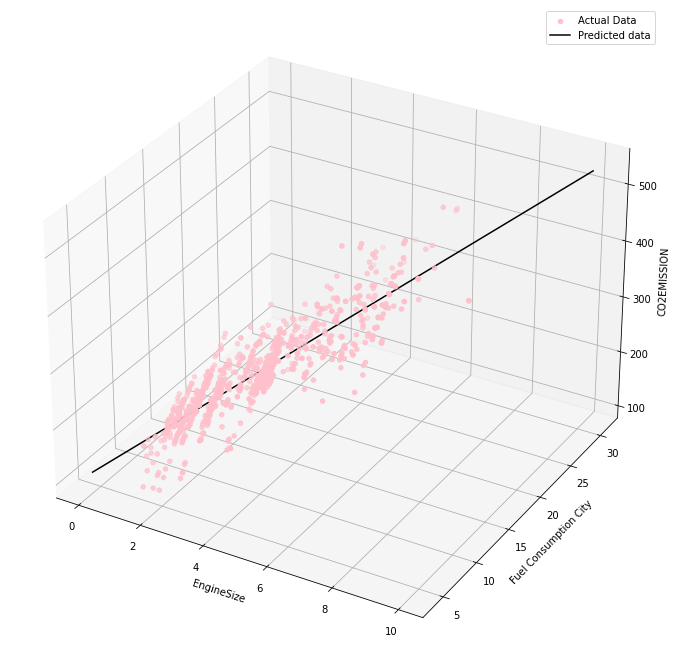

In [77]:
#model3DVis1 = LinearRegression().fit([[feature.columns[0:3:2]]],target)
model3DVis1 = LinearRegression().fit(
    feature[['ENGINESIZE', 'FUELCONSUMPTION_CITY']], target)

fig = plt.figure(1, figsize=(25, 12))  # 1st we have to generate figure
axes = plt.axes(projection='3d')

axes.scatter3D(feature[['ENGINESIZE']], feature[[
               'FUELCONSUMPTION_CITY']], target, label='Actual Data', color='pink')
axes.plot3D(dummyFeature1, dummyFeature2, model3DVis1.predict(dumFea).ravel(
), label='Predicted data', color='black')  # may b predicted value return as 2D,so we need to ravel

axes.legend()
axes.set_xlabel('EngineSize')
axes.set_ylabel('Fuel Consumption City')
axes.set_zlabel('CO2EMISSION')
plt.show()


In [78]:
#Saving Model
from joblib import dump
dump(modelVisu1 , 'VizualizationModel')

['VizualizationModel']

In [79]:
#If we want import and predict this model
from joblib import load
modell =load('VizualizationModel')

In [80]:
modell.predict(feature[['ENGINESIZE']])

array([[203.55449907],
       [219.20457898],
       [183.99189918],
       ...,
       [242.67969886],
       [250.50473881],
       [250.50473881]])

# Control c for shutdown terminal